In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os
from os import path
import glob
import pandas as pd

d = pd.read_csv('/content/drive/MyDrive/DATA.csv', sep=',', encoding='utf-8')

label = d['label']
title = d['title']
content = d['content']
text = []
for i in range (0, len(title)):
  text.append(str(title[i]) +str(' ') + str(content[i]))
print('ok')



ok


In [ ]:
i = {}
label_select = []
count = 0
for d in label:
    if d in i:
        i[d] += 1;
    else: 
        i[d] = 1
 
    
      
for d in i: 
    if(i[d] > 100):
        count +=i[d]
        label_select.append(d)
        print(str(d) + str(' ') + str(i[d]))


print(count)

Chính trị 2780
Thời sự 421
Doanh nghiệp 3905
Kinh doanh 2108
Bất động sản 3020
Chứng khoán 2511
Khoa học 4920
Giải trí 8459
Dân sinh 2355
Giao thông 2560
Pháp luật 2941
Giáo dục 2855
Sức khỏe 2842
Thị trường 2404
Thể thao 2606
46687


In [ ]:
change_label = { 
'ChinhTri' : 'Chính trị',
'DoanhNghiep': 'Doanh nghiệp',
'BatDongSan': 'Bất động sản',
'ChungKhoan': 'Chứng khoán',
'PhatMinh': 'Khoa học',
'Khoa hoc trong nuoc': 'Khoa học',
'UngDung': 'Khoa học',
'Phim' :'Giải trí',
'Nhac': 'Giải trí',
'Sach': 'Giải trí',
'Gioisao': 'Giải trí', 
'DanSinh':'Dân sinh', 
'GiaoThong': 'Giao thông', 
'HoSoPhaAn': 'Pháp luật', 
'Phapluat' : 'Pháp luật',
'DuHoc': 'Giáo dục', 
'KhoeDep': 'Sức khỏe',
'DanOng' : 'Sức khỏe',
'Tintuc': 'Sức khỏe', 
'ThiTruong': 'Thị trường', 
'BongDa':'Thể thao',
'Affcup2020':'Thể thao',
'Hautruong' :'Thể thao',
'Tuongthuat':'Thể thao',
'WorldCup2022':'Thể thao',
'Euro2021':'Thể thao',
'ThoiSu':'Thời sự',
'Mekong' : 'Thời sự',
'Ecommerce40' :'Kinh doanh',
'ViMo':'Kinh doanh',
'HangHoa' :'Kinh doanh',
'Ebank' :'Kinh doanh',
'QuocTe' :'Kinh doanh',
'BaoHiem' :'Kinh doanh',
'TienCuaToi' :'Kinh doanh',


}

In [ ]:
label2 = []
text2 = []
max = len(label)
for i in range(0, max):
    
    if(label[i] in change_label):
        label2.append(change_label[label[i]])
        text2.append(text[i])
print(len(label2))
print(len(text2))

46266
46266


In [ ]:
i = {}
count = 0

for d in label2:
    if d in i:
        i[d] += 1;
    else: 
        i[d] = 1
print (i)


{'Chính trị': 2780, 'Doanh nghiệp': 3905, 'Kinh doanh': 2108, 'Bất động sản': 3020, 'Chứng khoán': 2511, 'Khoa học': 4920, 'Giải trí': 8459, 'Dân sinh': 2355, 'Giao thông': 2560, 'Pháp luật': 2941, 'Giáo dục': 2855, 'Sức khỏe': 2842, 'Thị trường': 2404, 'Thể thao': 2606}


In [ ]:
label = label2
text = text2
print('ok')

ok


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

test_percent = 0.2

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)
 
# Lưu train/test data
# Giữ nguyên train/test để về sau so sánh các mô hình cho công bằng
with open('train.txt', 'w', encoding="UTF8") as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))
 
with open('test.txt', 'w', encoding="UTF8") as fp:
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))
 
# encode label
label_encoder = LabelEncoder()
label_encoder.fit(label)
sum_label =list(label_encoder.classes_)
# for i in label:
#   sum_label
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
print(sum_label)

['Bất động sản', 'Chính trị', 'Chứng khoán', 'Doanh nghiệp', 'Dân sinh', 'Giao thông', 'Giáo dục', 'Giải trí', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khỏe', 'Thể thao', 'Thị trường']


In [ ]:

import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

MODEL_PATH = "/content/Model"
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training Naive Bayes in', train_time, 'seconds.')
 
# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "naive_bayes.pkl"), 'wb'))

Done training Naive Bayes in 22.030275583267212 seconds.


In [ ]:
import numpy as np
# Naive Bayes
model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))

NameError: name 'pickle' is not defined

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=sum_label))


NameError: name 'y_test' is not defined

In [ ]:

import numpy as np

def c_m(y_test, y_pred):
  N = np.unique(y_test).shape[0]
  cm = np.zeros((N, N))  
  for n in range(y_test.shape[0]):
    cm[y_test[n], y_pred[n]] += 1
  return cm
cm = c_m(y_test, y_pred)




NameError: name 'y_test' is not defined

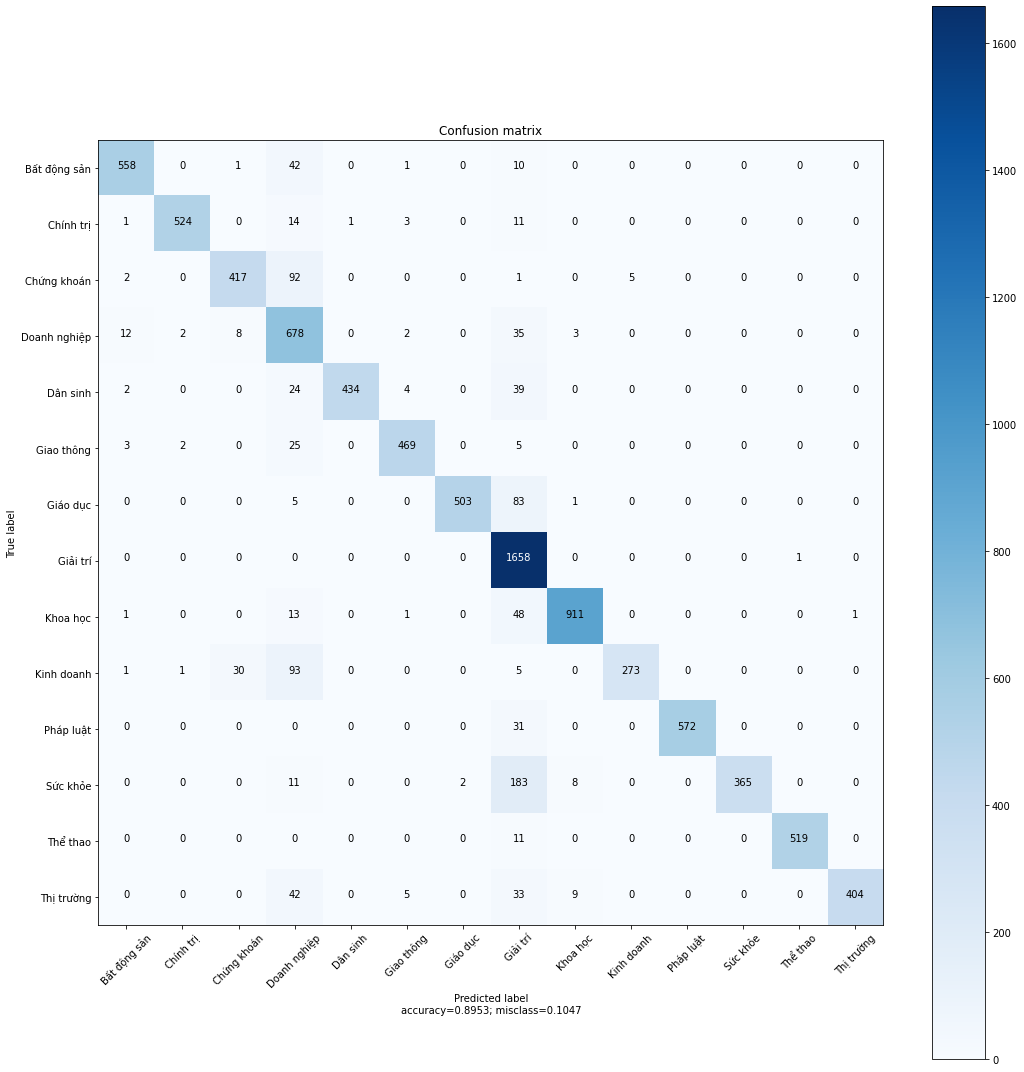

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('int')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.0f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()




plot_confusion_matrix(cm,sum_label)


In [ ]:
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
start_time = time.time()
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                             max_df=0.8,
                                             max_features=None)), 
                     ('tfidf', TfidfTransformer()),
                     ('clf', LogisticRegression(solver='lbfgs', 
                                                multi_class='auto',
                                                max_iter=10000))
                    ])
text_clf = text_clf.fit(X_train, y_train)
 
train_time = time.time() - start_time
print('Done training Linear Classifier in', train_time, 'seconds.')
 
# Save model
pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "linear_classifier.pkl"), 'wb'))

Done training Linear Classifier in 89.5555682182312 seconds.


In [ ]:
# import numpy as np
# # Naive Bayes
# model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
# y_pred = model.predict(X_test)
# print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))
 
# Linear Classifier
model = pickle.load(open(os.path.join(MODEL_PATH,"linear_classifier.pkl"), 'rb'))
y_pred = model.predict(X_test)
print('Linear Classifier, Accuracy =', np.mean(y_pred == y_test))
 
# # SVM
# model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
# y_pred = model.predict(X_test)
# print('SVM, Accuracy =', np.mean(y_pred == y_test))

Linear Classifier, Accuracy = 0.9704228794915668


In [ ]:
import numpy as np

def cm2pr_binary(cm):
  p =cm[0, 0]/ np.sum(cm[:, 0])
  r = cm[0, 0]/np.sum(cm[0])
  return p, r

p,r = cm2pr_binary(cnf_matrix)
print(p, r)


0.9594594594594594 0.9073482428115016
